<a href="https://colab.research.google.com/github/erickgt00/MLMCD/blob/main/tareas/articuloextra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing PyCaret
# !pip install --ignore-installed pycaret --user
# !pip install pycaret



In [1]:
import pandas as pd, numpy as np, plotly.express as px, matplotlib.pyplot as plt, seaborn as sns


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("train.csv")

limpiamos

In [4]:
df = df[['Loan Amount','Term','Interest Rate','Grade','Loan Status']]
df.head()

,Loan Amount,Term,Interest Rate,Grade,Loan Status
0,10000,59,11.135007,2,0
1,3609,59,12.237563,3,0
2,28276,59,12.545884,6,0
3,11170,59,16.731201,3,0
4,16890,59,15.008300,3,0


In [5]:
df.info


<bound method DataFrame.info of        Loan Amount  Term  Interest Rate  Grade  Loan Status
0            10000    59      11.135007      2            0
1             3609    59      12.237563      3            0
2            28276    59      12.545884      6            0
3            11170    59      16.731201      3            0
4            16890    59      15.008300      3            0
...            ...   ...            ...    ...          ...
67458        13601    59       9.408858      3            1
67459         8323    59       9.972104      3            0
67460        15897    59      19.650943      1            0
67461        16567    59      13.169095      4            0
67462        15353    59      16.034631      2            0

[67463 rows x 5 columns]>

In [6]:
test = df.tail(13494) # 20% of dataset will be used for testing
test

,Loan Amount,Term,Interest Rate,Grade,Loan Status
53969,13639,58,9.691307,1,0
53970,19842,59,6.095775,3,0
53971,21444,58,12.081569,2,0
53972,5486,59,8.017538,6,0
53973,11931,58,18.844249,2,0
...,...,...,...,...,...
67458,13601,59,9.408858,3,1
67459,8323,59,9.972104,3,0
67460,15897,59,19.650943,1,0
67461,16567,59,13.169095,4,0


El 80% restante es para el entrenamiento

In [7]:
train = df.drop(test.index)
train

,Loan Amount,Term,Interest Rate,Grade,Loan Status
0,10000,59,11.135007,2,0
1,3609,59,12.237563,3,0
2,28276,59,12.545884,6,0
3,11170,59,16.731201,3,0
4,16890,59,15.008300,3,0
...,...,...,...,...,...
53964,11550,58,10.913305,3,0
53965,10815,58,15.077551,3,1
53966,33511,59,9.126601,2,0
53967,13914,59,13.909706,4,0


In [12]:
from pycaret.classification import *

In [15]:
setup(# Defining training data
     data = train, 
     # defining target variable
     target = 'Loan Status',
     # 75% of training set will be used for training, 25% will be used for validation while on hold-out
     train_size = 0.75,
     # Ignore index, it won't be any relevant for model building
     ignore_features = ['Index'],
     # This param fixes class imablance with SMOTE technique, increasing the minority class
     fix_imbalance = True,
     # Normalizing features to have them all on a the same scale,
     normalize = True,
     # Transforming features into a Gaussian-like distribution)
     transformation = True)

,Description,Value
0,Session id,8933
1,Target,Loan Status
2,Target type,Binary
3,Original data shape,"(53969, 5)"
4,Transformed data shape,"(86901, 5)"
5,Transformed train set shape,"(73408, 5)"
6,Transformed test set shape,"(13493, 5)"
7,Ignore features,1
8,Numeric features,4
9,Preprocess,True


In [16]:
# Let's run a bunch of different classification algorithms and rank them by their recall score
compare_models(sort = 'Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.4603,0.5022,0.5480,0.0931,0.1591,-0.0003,-0.0004,0.1620
nb,Naive Bayes,0.4604,0.5030,0.5437,0.0925,0.1581,-0.0014,-0.0026,0.1510
svm,SVM - Linear Kernel,0.4872,0.0000,0.5361,0.0959,0.1621,0.0056,0.0109,0.4130
lr,Logistic Regression,0.5197,0.5147,0.4989,0.0968,0.1622,0.0072,0.0121,1.0070
ridge,Ridge Classifier,0.5196,0.0000,0.4989,0.0968,0.1622,0.0072,0.0120,0.1410
lda,Linear Discriminant Analysis,0.5196,0.5147,0.4989,0.0968,0.1622,0.0072,0.0120,0.2020
knn,K Neighbors Classifier,0.8122,0.5027,0.1272,0.1003,0.1121,0.0088,0.0089,0.3810
dt,Decision Tree Classifier,0.8153,0.5018,0.1164,0.0960,0.1052,0.0033,0.0034,0.4830
et,Extra Trees Classifier,0.8605,0.4984,0.0634,0.1016,0.0780,0.0069,0.0072,6.9470
rf,Random Forest Classifier,0.8748,0.5044,0.0504,0.1140,0.0698,0.0133,0.0147,14.1960


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

Let's create three different models with the top 3 best ranked algorithms, tune them, blend them and see how this affects performance!

In [18]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4600,0.5019,0.5385,0.0916,0.1566,-0.0030,-0.0056
1,0.4587,0.5326,0.6154,0.1018,0.1748,0.0178,0.0340
2,0.4708,0.5203,0.5650,0.0972,0.1659,0.0083,0.0153
3,0.4595,0.5039,0.5517,0.0934,0.1598,0.0005,0.0010
4,0.4560,0.5013,0.5476,0.0925,0.1583,-0.0018,-0.0034
5,0.4536,0.4901,0.5238,0.0888,0.1518,-0.0093,-0.0175
6,0.4574,0.4922,0.5438,0.0920,0.1573,-0.0024,-0.0045
7,0.4687,0.4875,0.5305,0.0920,0.1569,-0.0023,-0.0041
8,0.4569,0.4864,0.5172,0.0882,0.1507,-0.0101,-0.0187


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4595,0.5028,0.5358,0.0912,0.1559,-0.0039,-0.0073
1,0.4617,0.5363,0.6048,0.1010,0.1731,0.0160,0.0303
2,0.4713,0.5205,0.5597,0.0966,0.1647,0.0070,0.0128
3,0.4595,0.5030,0.5491,0.0930,0.1591,-0.0002,-0.0004
4,0.4548,0.5041,0.5476,0.0923,0.1580,-0.0022,-0.0042
5,0.4555,0.4905,0.5185,0.0884,0.1510,-0.0102,-0.0190
6,0.4547,0.4921,0.5358,0.0904,0.1547,-0.0056,-0.0104
7,0.4670,0.4868,0.5225,0.0906,0.1544,-0.0051,-0.0094
8,0.4552,0.4862,0.5146,0.0875,0.1496,-0.0114,-0.0212


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4807,0.0000,0.5703,0.0998,0.1698,0.0134,0.0244
1,0.5850,0.0000,0.4032,0.0946,0.1532,0.0028,0.0041
2,0.3468,0.0000,0.7401,0.0988,0.1743,0.0119,0.0294
3,0.5227,0.0000,0.5491,0.1051,0.1765,0.0239,0.0402
4,0.4647,0.0000,0.5635,0.0962,0.1643,0.0057,0.0105
5,0.5492,0.0000,0.4365,0.0929,0.1531,-0.0010,-0.0016
6,0.4430,0.0000,0.5782,0.0942,0.1621,0.0022,0.0043
7,0.4401,0.0000,0.5782,0.0938,0.1614,0.0012,0.0024
8,0.5792,0.0000,0.3793,0.0887,0.1438,-0.0085,-0.0124


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8733,0.5071,0.0451,0.1000,0.0622,0.0045,0.0049
1,0.8777,0.5039,0.0504,0.1218,0.0713,0.0177,0.0197
2,0.8767,0.5259,0.0504,0.1188,0.0708,0.0162,0.0179
3,0.8713,0.5007,0.0371,0.0814,0.0510,-0.0078,-0.0085
4,0.8799,0.5268,0.0503,0.1301,0.0725,0.0216,0.0244
5,0.8775,0.5027,0.0556,0.1312,0.0781,0.0238,0.0264
6,0.8735,0.4892,0.0531,0.1143,0.0725,0.0142,0.0155
7,0.8708,0.4777,0.0557,0.1117,0.0743,0.0132,0.0141
8,0.8723,0.4884,0.0504,0.1067,0.0685,0.0093,0.0100


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
# Blending models 
blended_model = blend_models(estimator_list = [qda, nb, svm],
                            fold = 10,
                            optimize = 'Recall',
                            choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4543,0.0000,0.5491,0.0922,0.1578,-0.0020,-0.0037
1,0.4592,0.0000,0.6207,0.1026,0.1761,0.0194,0.0371
2,0.4662,0.0000,0.5756,0.0978,0.1672,0.0096,0.0178
3,0.4543,0.0000,0.5597,0.0936,0.1604,0.0010,0.0018
4,0.4538,0.0000,0.5582,0.0936,0.1603,0.0004,0.0007
5,0.4501,0.0000,0.5291,0.0890,0.1523,-0.0090,-0.0169
6,0.4554,0.0000,0.5438,0.0916,0.1568,-0.0031,-0.0058
7,0.4638,0.0000,0.5332,0.0916,0.1563,-0.0032,-0.0059
8,0.4527,0.0000,0.5199,0.0879,0.1504,-0.0107,-0.0201


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [23]:
tuned_qda = tune_model(qda,
                        n_iter = 1000,
                        optimize = 'Recall',
                        choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4583,0.5118,0.5756,0.0964,0.1652,0.0068,0.0127
1,0.4531,0.5248,0.6180,0.1012,0.1739,0.0165,0.0318
2,0.4545,0.5374,0.6313,0.1032,0.1773,0.0205,0.0397
3,0.4466,0.5218,0.6048,0.0983,0.1691,0.0106,0.0207
4,0.4531,0.5097,0.5873,0.0974,0.1670,0.0081,0.0156
5,0.4479,0.5027,0.5635,0.0933,0.1601,-0.0002,-0.0003
6,0.4475,0.4818,0.5305,0.0885,0.1517,-0.0094,-0.0179
7,0.4613,0.4933,0.5570,0.0945,0.1615,0.0027,0.0050
8,0.4537,0.4864,0.5570,0.0932,0.1596,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 101 candidates, totalling 1010 fits


In [24]:
tuned_nb = tune_model(nb,
                        n_iter = 1000,
                        optimize = 'Recall',
                        choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2809,0.5079,0.7613,0.0923,0.1647,-0.0017,-0.0049
1,0.3103,0.5320,0.7772,0.0976,0.1735,0.0096,0.0262
2,0.2863,0.5272,0.7798,0.0948,0.1691,0.0036,0.0106
3,0.2999,0.5140,0.7639,0.0950,0.1689,0.0039,0.0108
4,0.2962,0.5060,0.7513,0.0935,0.1662,0.0002,0.0004
5,0.2937,0.4970,0.7407,0.0921,0.1638,-0.0028,-0.0078
6,0.3136,0.4861,0.7029,0.0904,0.1602,-0.0058,-0.0153
7,0.2785,0.4901,0.7586,0.0918,0.1638,-0.0029,-0.0084
8,0.2916,0.4867,0.7162,0.0891,0.1585,-0.0086,-0.0240


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 28 candidates, totalling 280 fits


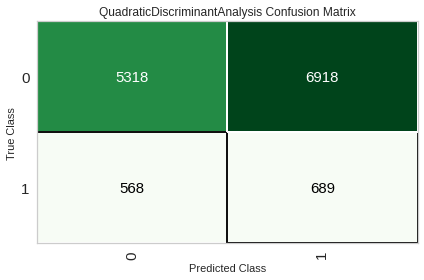

In [29]:
plot_model(tuned_qda, plot = 'confusion_matrix')

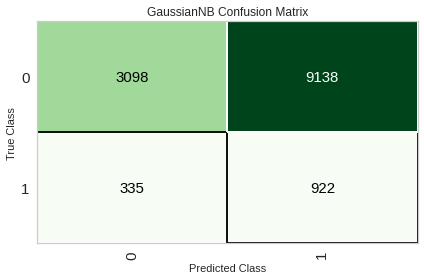

In [30]:
plot_model(tuned_nb, plot = 'confusion_matrix')

In [32]:
predict_model(tuned_qda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.4452,0.4936,0.5481,0.0906,0.1555,-0.0053,-0.0101


,Loan Amount,Term,Interest Rate,Grade,Loan Status,prediction_label,prediction_score
7968,21398,59,10.717747,2,0,1,0.5102
34360,21094,58,7.276159,5,0,0,0.5326
20701,24898,59,10.121894,2,0,1,0.5064
53722,19871,59,5.918736,2,1,0,0.5580
1208,31873,59,11.701484,1,0,0,0.5448
...,...,...,...,...,...,...,...
26477,22250,59,13.466263,2,0,1,0.5135
47996,21292,58,10.552023,2,0,0,0.5106
40013,20061,59,20.621599,5,0,0,0.5019
35098,14235,59,10.827754,2,0,1,0.5134


In [33]:
# Finalizing model before testing it with unseen data
model = finalize_model(tuned_qda)
print(model) # Printing final model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Loan Amount', 'Term',
                                             'Interest Rate', 'Grade'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 Transfor...
                 TransformerWrapper(exclude=None, include=None,
                 

In [34]:
test # testing set

,Loan Amount,Term,Interest Rate,Grade,Loan Status
53969,13639,58,9.691307,1,0
53970,19842,59,6.095775,3,0
53971,21444,58,12.081569,2,0
53972,5486,59,8.017538,6,0
53973,11931,58,18.844249,2,0
...,...,...,...,...,...
67458,13601,59,9.408858,3,1
67459,8323,59,9.972104,3,0
67460,15897,59,19.650943,1,0
67461,16567,59,13.169095,4,0


In [35]:
predictions = predict_model(model, data = test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.4436,0.5060,0.5751,0.0906,0.1566,0.0017,0.0033


In [36]:
predictions

,Loan Amount,Term,Interest Rate,Grade,Loan Status,prediction_label,prediction_score
53969,13639,58,9.691307,1,0,0,0.5773
53970,19842,59,6.095776,3,0,0,0.5263
53971,21444,58,12.081570,2,0,0,0.5064
53972,5486,59,8.017538,6,0,1,0.5004
53973,11931,58,18.844250,2,0,0,0.5202
...,...,...,...,...,...,...,...
67458,13601,59,9.408858,3,1,1,0.5279
67459,8323,59,9.972104,3,0,1,0.5370
67460,15897,59,19.650944,1,0,0,0.5735
67461,16567,59,13.169095,4,0,1,0.5391


Recall on testing 57.51%

In [40]:
y_test = predictions['Loan Status']
pred = predictions['prediction_label']

In [41]:
y_test.value_counts()

0    12282
1     1212
Name: Loan Status, dtype: int64

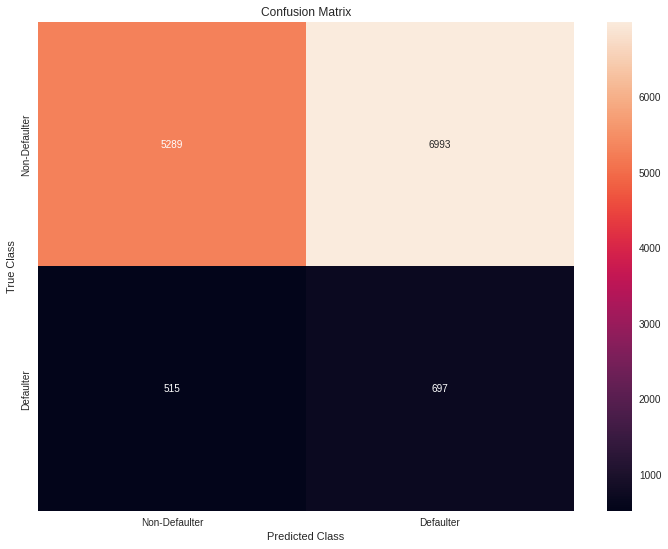

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12,9))
ax = plt.subplot()
sns.heatmap(cm,annot = True, fmt ='g', ax = ax)
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non-Defaulter','Defaulter'])
ax.yaxis.set_ticklabels(['Non-Defaulter','Defaulter'])
plt.show()